In [1]:
import pandas as pd

In [3]:
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("../../all_data/主資料集/台北市_10101_11303_房價data.csv")

**有車子但是沒有給車價的**

In [48]:
park_space = df[['total_price', 'total_area_ping', 'price_per_ping',  'number_of_parking_space', 'parking_space_price', 'main_building_ratio']]

In [49]:
have_park = park_space[ park_space['number_of_parking_space'] != 0 ]

In [50]:
# 有車位也有車價的，然後我們要去確認一下他的每坪計算方式是不是都有做扣除車位價格的動作
have_price_have_car = have_park[ have_park['parking_space_price'].notnull() ]

In [51]:
count = 0
have_price_have_car['multiple'] = have_price_have_car['price_per_ping'] * have_price_have_car['total_area_ping']

C:\Users\Tony\AppData\Local\Temp\ipykernel_6808\856482333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  have_price_have_car['multiple'] = have_price_have_car['price_per_ping'] * have_price_have_car['total_area_ping']


In [52]:
have_price_have_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38177 entries, 18 to 243164
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_price              38177 non-null  int64  
 1   total_area_ping          38177 non-null  float64
 2   price_per_ping           38055 non-null  float64
 3   number_of_parking_space  38177 non-null  int64  
 4   parking_space_price      38177 non-null  float64
 5   main_building_ratio      36496 non-null  float64
 6   multiple                 38055 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.3 MB


In [59]:
# 所以即使有給車位，每評價格的算法也是有總價/總坪數的，或只是剛好兩者價格差不多的...所以算起來也差不多....
have_price_have_car[ have_price_have_car['multiple'] > (have_price_have_car['total_price']) ]

,total_price,total_area_ping,price_per_ping,number_of_parking_space,parking_space_price,main_building_ratio,multiple
18,286080000,228.87,1399732.0,4,1220.0,45.92,3.203567e+08
20,256280000,179.88,1626179.0,4,1400.0,42.74,2.925171e+08
23,319750000,211.86,1718073.0,4,1280.0,45.32,3.639909e+08
76,105000000,141.00,928807.0,4,1020.0,40.53,1.309618e+08
77,95000000,137.25,759901.0,2,550.0,46.78,1.042964e+08
...,...,...,...,...,...,...,...
243155,37280000,50.88,940208.0,1,230.0,37.00,4.783778e+07
243159,33800000,42.99,799888.0,1,180.0,55.51,3.438719e+07
243161,35000000,49.26,781987.0,1,180.0,50.94,3.852068e+07
243163,28100000,34.01,899696.0,1,200.0,48.72,3.059866e+07


In [61]:
# 而只要是有給車價且分開計價者，主建物使用率都超級低
# 這也是他們必須要扣掉車價、車坪的原因
# 但車坪地某一部份算是"公設"，這也會反應在主建物使用率上
# 這大概也算是側寫了
look_ratio = have_price_have_car[ have_price_have_car['multiple'] > (have_price_have_car['total_price']) ]
look_ratio['main_building_ratio'].describe()

count    34264.000000
mean        46.130787
std          8.548502
min          3.550000
25%         41.380000
50%         45.460000
75%         49.270000
max        100.000000
Name: main_building_ratio, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243176 entries, 0 to 243175
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     243176 non-null  int64  
 1   usage_category                 242958 non-null  object 
 2   address                        243176 non-null  object 
 3   property_type                  243174 non-null  object 
 4   community_name                 136206 non-null  object 
 5   main_building_ratio            227424 non-null  float64
 6   city                           243176 non-null  object 
 7   parking_space_price            38223 non-null   float64
 8   transaction_date               243176 non-null  object 
 9   elevator_available             83323 non-null   float64
 10  building_age                   196408 non-null  float64
 11  number_of_land                 243176 non-null  int64  
 12  number_of_building            

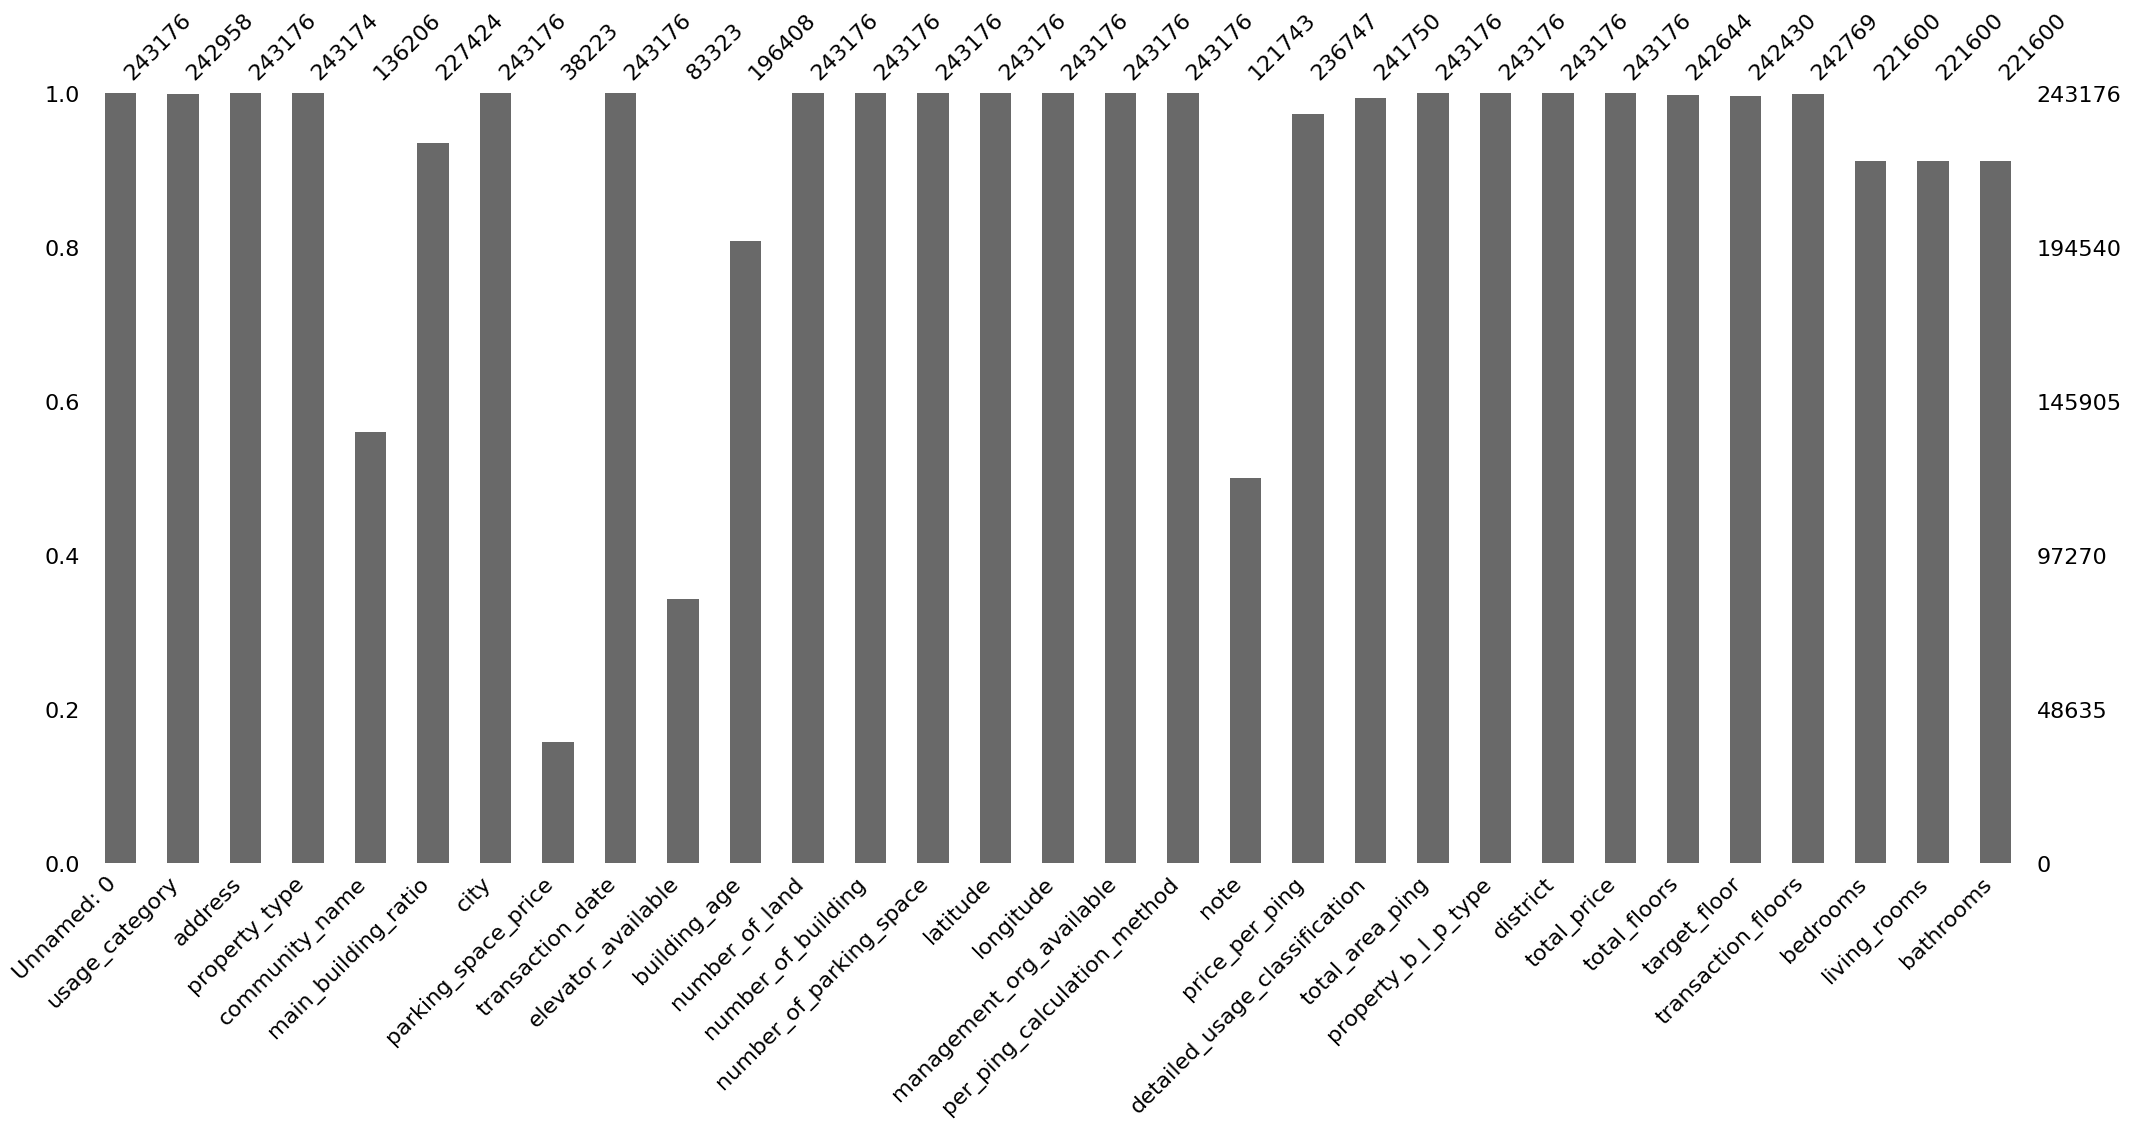

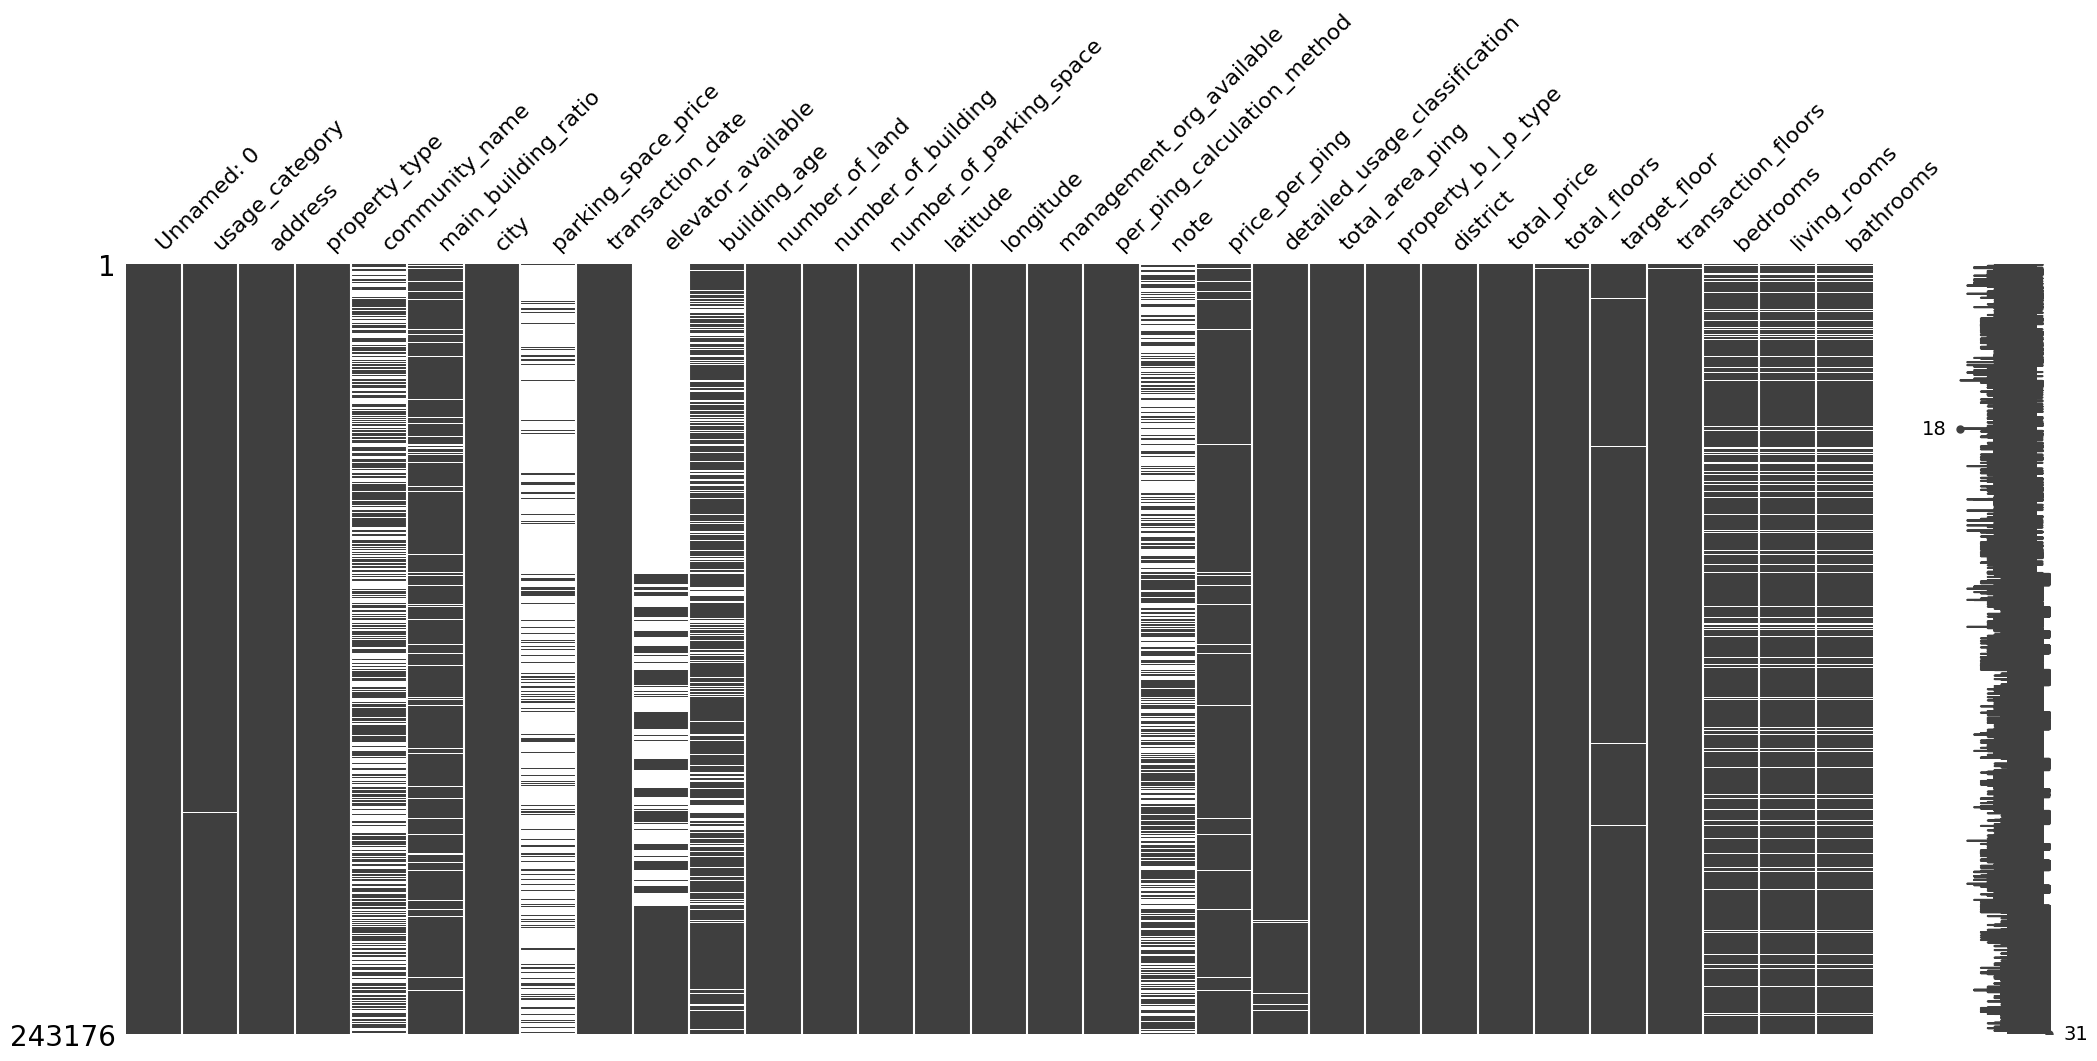

In [51]:
import missingno as msno
import matplotlib.pyplot as plt


msno.bar(df)  # 繪製缺失值的條形圖
plt.show()  # 顯示圖表


msno.matrix(df)  # 繪製缺失值的矩陣圖
plt.show()  # 顯示圖表

<Axes: >

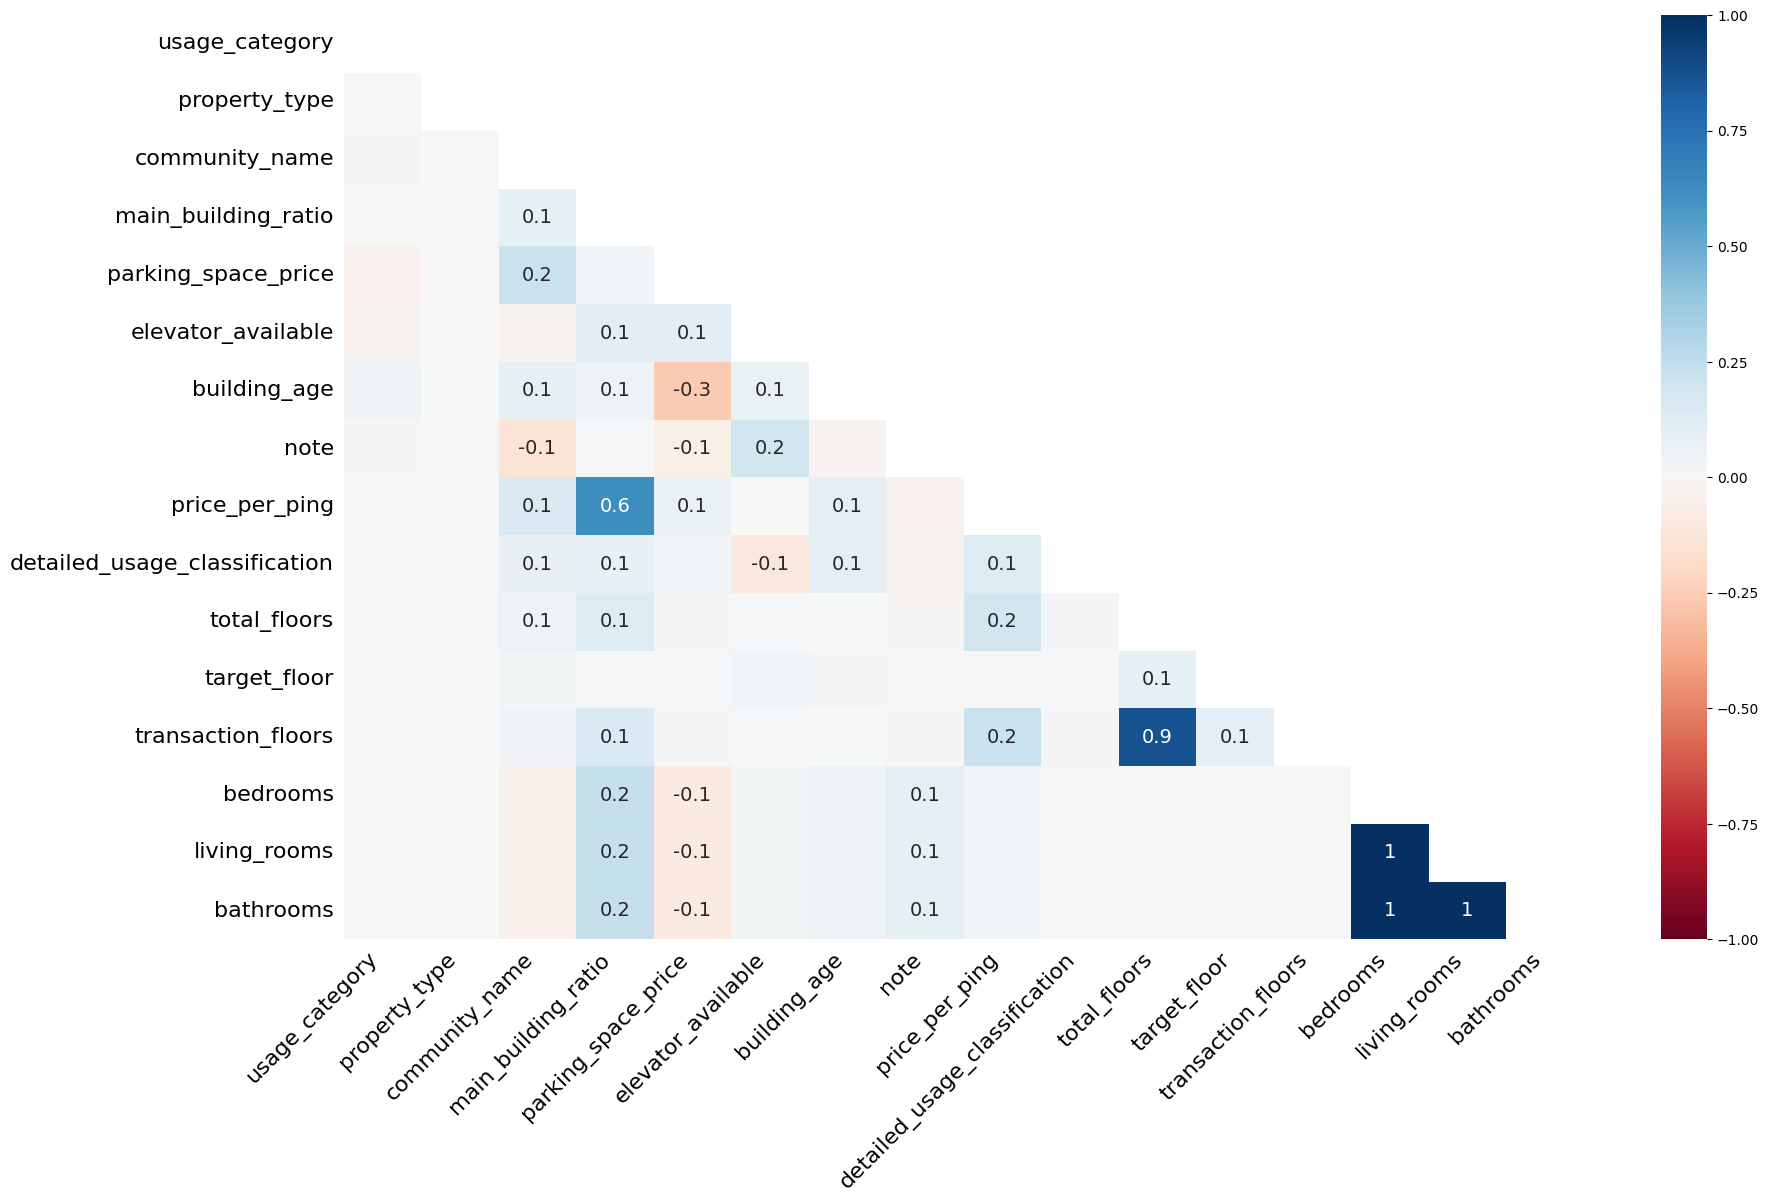

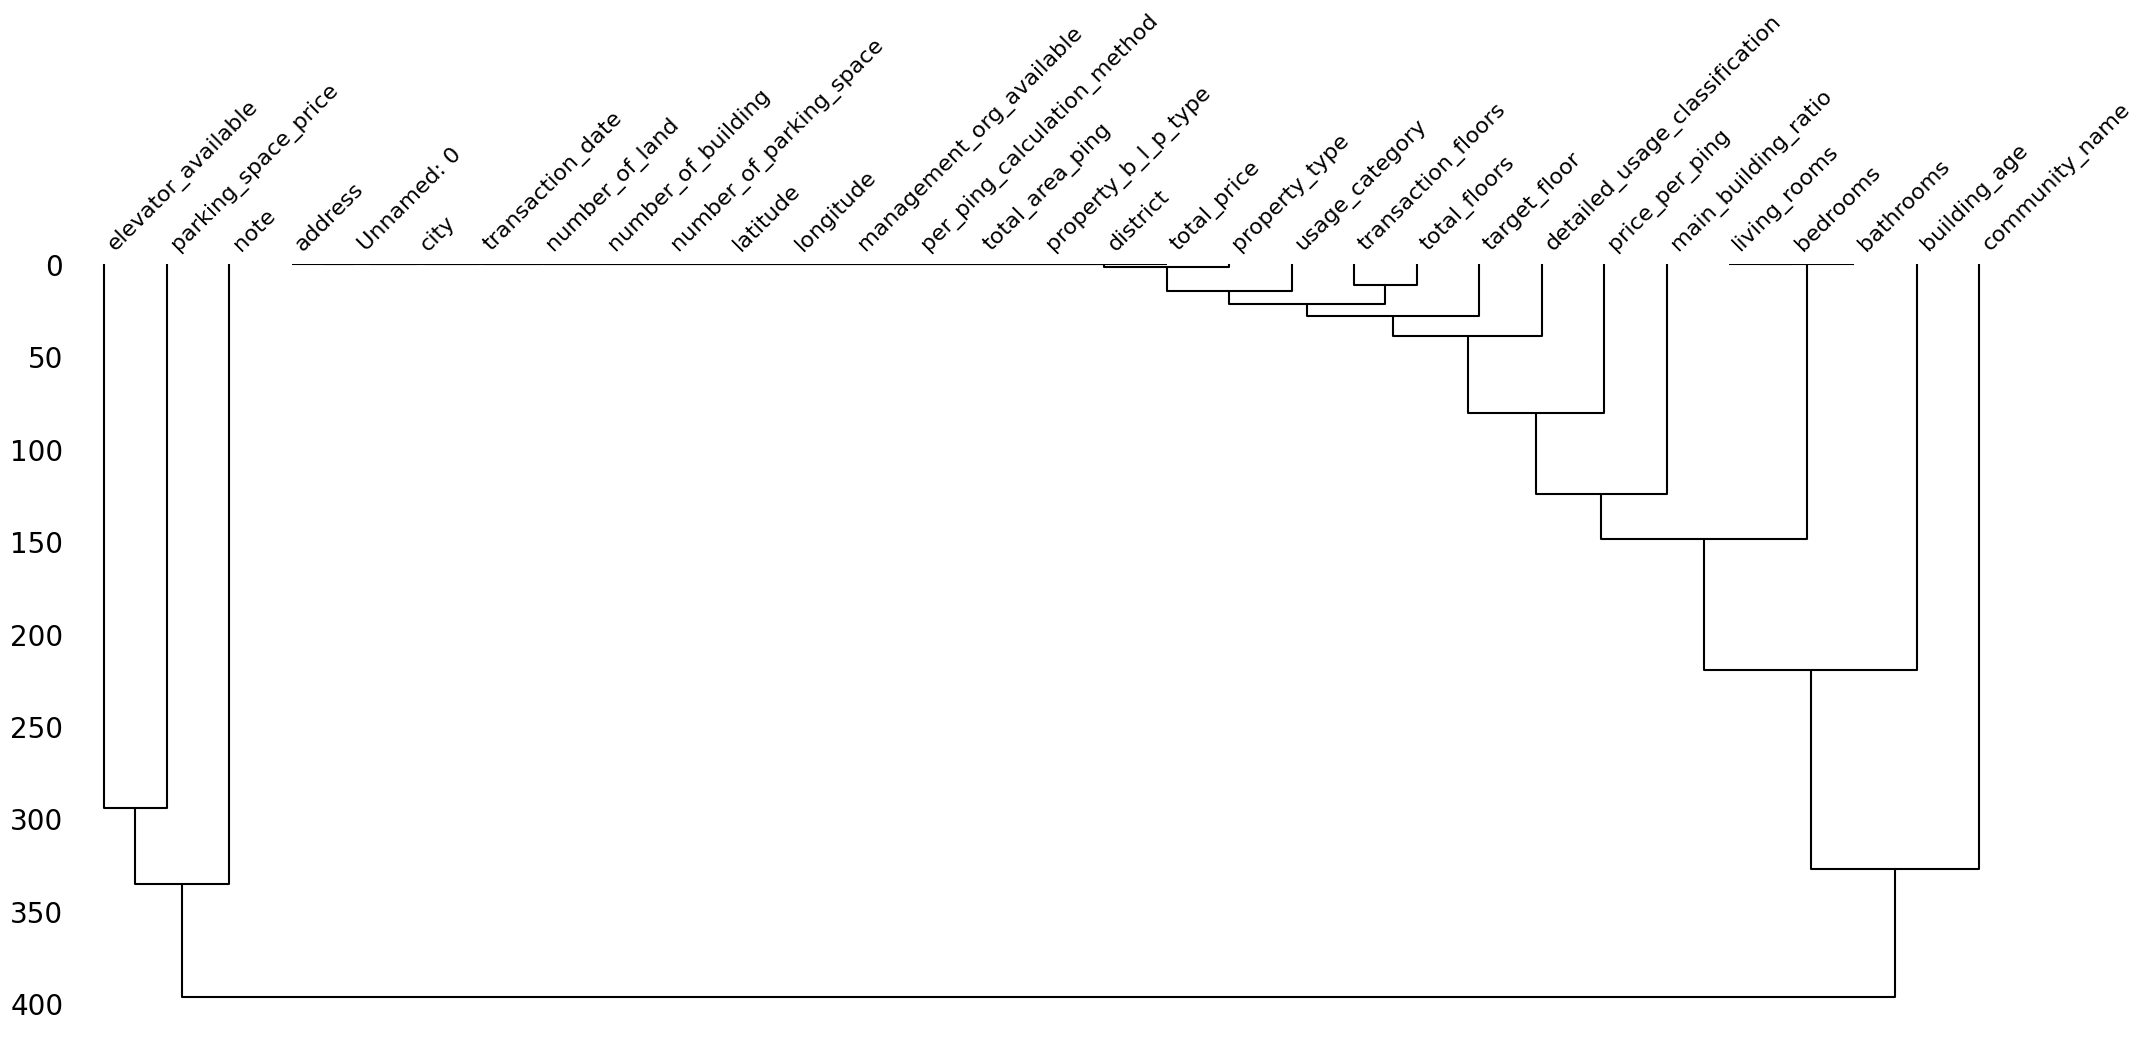

In [52]:
msno.heatmap(df)
msno.dendrogram(df)

In [18]:
df['per_ping_calculation_method'].value_counts()

per_ping_calculation_method
總價/總面積                          208207
(總價-車位總價)/(總面積-車位總面積)            34884
總面積-車位總面積 剩餘面積小於1平方公尺 ,不計算單價        85
Name: count, dtype: int64

In [19]:
parking = df[['per_ping_calculation_method', 'parking_space_price']]

In [48]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243176 entries, 0 to 243175
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   per_ping_calculation_method  243176 non-null  object 
 1   parking_space_price          38223 non-null   float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [28]:
parking['per_ping_calculation_method'].unique()

array(['總價/總面積', '(總價-車位總價)/(總面積-車位總面積)', '總面積-車位總面積 剩餘面積小於1平方公尺 ,不計算單價'],
      dtype=object)

In [32]:
parking['parking_space_price'].isnull().value_counts()

parking_space_price
True     204953
False     38223
Name: count, dtype: int64

In [41]:
b = parking[ parking['per_ping_calculation_method'] == '(總價-車位總價)/(總面積-車位總面積)']

In [47]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34884 entries, 18 to 243164
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   per_ping_calculation_method  34884 non-null  object 
 1   parking_space_price          34884 non-null  float64
dtypes: float64(1), object(1)
memory usage: 817.6+ KB


In [46]:
b[ b['parking_space_price'].notnull() ]

,per_ping_calculation_method,parking_space_price
18,(總價-車位總價)/(總面積-車位總面積),1220.0
20,(總價-車位總價)/(總面積-車位總面積),1400.0
23,(總價-車位總價)/(總面積-車位總面積),1280.0
76,(總價-車位總價)/(總面積-車位總面積),1020.0
77,(總價-車位總價)/(總面積-車位總面積),550.0
...,...,...
243155,(總價-車位總價)/(總面積-車位總面積),230.0
243159,(總價-車位總價)/(總面積-車位總面積),180.0
243161,(總價-車位總價)/(總面積-車位總面積),180.0
243163,(總價-車位總價)/(總面積-車位總面積),200.0


In [ ]:
a = parking[ (parking['per_ping_calculation_method'] == '總價/總面積') & (parking['parking_space_price'].isnull()) ]

In [31]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204916 entries, 0 to 243175
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   per_ping_calculation_method  204916 non-null  object 
 1   parking_space_price          0 non-null       float64
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243176 entries, 0 to 243175
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     243176 non-null  int64  
 1   usage_category                 242958 non-null  object 
 2   address                        243176 non-null  object 
 3   property_type                  243174 non-null  object 
 4   community_name                 136206 non-null  object 
 5   main_building_ratio            227424 non-null  float64
 6   city                           243176 non-null  object 
 7   parking_space_price            38223 non-null   float64
 8   transaction_date               243176 non-null  object 
 9   elevator_available             83323 non-null   float64
 10  building_age                   196408 non-null  float64
 11  number_of_land                 243176 non-null  int64  
 12  number_of_building            

In [11]:
df['number_of_parking_space'].describe()

count    243176.000000
mean          0.514076
std           2.715859
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         448.000000
Name: number_of_parking_space, dtype: float64

In [81]:
ele = df[df['elevator_available'].isnull()]
ele['property_type'].value_counts()

property_type
住宅大樓(11層含以上有電梯)    50910
公寓(5樓含以下無電梯)       41209
華廈(10層含以下有電梯)      33553
套房(1房(1廳)1衛)       18949
辦公商業大樓              5160
透天厝                 4077
店面（店舖)              3438
其他                  1212
廠辦                  1209
工廠                    98
倉庫                    24
農舍                    14
Name: count, dtype: int64

# 清整邏輯
---
將不同的每坪計算方式統一成(總價/總面積)，因為原始資料的每坪價格依方式而不同捨棄，我們自行計算
以總價(total_price)/總坪數(全包(含車位))(total_area_ping)

預測目標(y)是房屋總價 

drop欄位: 
    每坪價格(price_per_ping)

    每坪價格計算方式(per_ping_calculation_method)
    
    車位價格(parking_space_price)


In [7]:
# 全部轉成" 總價/總面積 "格式
# 總坪數是全部(含車位)
df.isna().sum()
# community_name 106970 >> 應該會轉為0,1是否為社區 或drop掉
# parking_space_price >> 幾乎都沒有，那計算公式要考慮一下(那基本上就要假設房價是包含車位價格的，車位單價就不管，用車位數量決定有沒有就好number_of_parking_space)
# note 要馬作詞義切分再轉one-hot要馬drop掉

Unnamed: 0                            0
usage_category                      218
address                               0
property_type                         2
community_name                   106970
main_building_ratio               15752
city                                  0
parking_space_price              204953
transaction_date                      0
elevator_available               159853
building_age                      46768
number_of_land                        0
number_of_building                    0
number_of_parking_space               0
latitude                              0
longitude                             0
management_org_available              0
per_ping_calculation_method           0
note                             121433
price_per_ping                     6429
detailed_usage_classification      1426
total_area_ping                       0
property_b_l_p_type                   0
district                              0
total_price                           0


In [67]:
# 農舍 倉庫 工廠 其他可能要drop掉
df['property_type'].value_counts()

property_type
住宅大樓(11層含以上有電梯)    87429
公寓(5樓含以下無電梯)       63669
華廈(10層含以下有電梯)      55758
套房(1房(1廳)1衛)       18951
透天厝                 6132
辦公商業大樓              5163
店面（店舖)              3440
廠辦                  1282
其他                  1214
工廠                    98
倉庫                    24
農舍                    14
Name: count, dtype: int64

In [77]:
nonfloor = df[ df['target_floor'].isnull() ]

In [79]:
nonfloor[ nonfloor['property_type'] == '公寓(5樓含以下無電梯)']

,Unnamed: 0,usage_category,address,property_type,community_name,main_building_ratio,city,parking_space_price,transaction_date,elevator_available,...,total_area_ping,property_b_l_p_type,district,total_price,total_floors,target_floor,transaction_floors,bedrooms,living_rooms,bathrooms
2046,2046,住,士林區永平街０８０巷００１６號１樓#士林區永平街８０巷１６號１樓,公寓(5樓含以下無電梯),NaN,93.62,A,NaN,2015-06-29,NaN,...,23.29,房地(土地+建物),A15,6500000,NaN,NaN,NaN,3.0,1.0,1.0
2047,2047,住,士林區中山北路００７段０８１巷００２５號４樓#士林區中山北路７段８１巷２５號４樓,公寓(5樓含以下無電梯),NaN,85.42,A,NaN,2015-06-08,NaN,...,37.64,房地(土地+建物),A15,24880000,NaN,NaN,NaN,3.0,2.0,2.0
2221,2221,住,士林區中山北路七段１２４巷０００８號一樓#士林區中山北路七段１２４巷８號一樓,公寓(5樓含以下無電梯),NaN,90.03,A,NaN,2015-04-08,NaN,...,73.93,房地(土地+建物),A15,37500000,5.0,NaN,0.0,6.0,2.0,3.0
2944,2944,住,士林區中正路３４９巷００２０號三樓#士林區中正路３４９巷２０號三樓,公寓(5樓含以下無電梯),NaN,100.00,A,NaN,2014-11-19,NaN,...,44.17,房地(土地+建物),A15,21980000,4.0,NaN,1.0,3.0,2.0,2.0
3165,3165,住,士林區天母西路００５巷００１０號二樓#士林區天母西路５巷１０號二樓,公寓(5樓含以下無電梯),NaN,100.00,A,NaN,2014-09-18,NaN,...,71.42,房地(土地+建物),A15,34061600,4.0,NaN,1.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216657,216657,其他,內湖區安泰街０３８巷０００６號三樓#內湖區安泰街３８巷６號三樓,公寓(5樓含以下無電梯),福祿,NaN,A,NaN,2023-03-08,1.0,...,34.81,房地(土地+建物),A14,17300000,NaN,NaN,NaN,3.0,2.0,2.0
229209,229209,商,松山區復興南路一段０００５號三樓#松山區復興南路一段５號三樓,公寓(5樓含以下無電梯),NaN,NaN,A,NaN,2023-02-10,1.0,...,30.86,房地(土地+建物),A01,26180000,NaN,NaN,NaN,NaN,NaN,NaN
229367,229367,商,松山區復興南路一段０００５號#松山區復興南路一段５號,公寓(5樓含以下無電梯),NaN,NaN,A,NaN,2023-01-04,1.0,...,30.86,房地(土地+建物),A01,26400000,NaN,NaN,NaN,NaN,NaN,NaN
236298,236298,商,萬華區康定路０１１２號四樓#萬華區康定路１１２號四樓,公寓(5樓含以下無電梯),NaN,NaN,A,NaN,2023-02-17,1.0,...,22.37,房地(土地+建物),A05,8550000,NaN,NaN,NaN,3.0,2.0,1.0


In [62]:
nonfloor['transaction_floors'].value_counts()

transaction_floors
1.0    102
2.0     19
3.0      3
4.0      1
Name: count, dtype: int64

In [8]:
df_test = df.head(1000)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1000 non-null   int64  
 1   usage_category                 1000 non-null   object 
 2   address                        1000 non-null   object 
 3   property_type                  1000 non-null   object 
 4   community_name                 430 non-null    object 
 5   main_building_ratio            943 non-null    float64
 6   city                           1000 non-null   object 
 7   parking_space_price            123 non-null    float64
 8   transaction_date               1000 non-null   object 
 9   elevator_available             2 non-null      float64
 10  building_age                   900 non-null    float64
 11  number_of_land                 1000 non-null   int64  
 12  number_of_building             1000 non-null   in